In [9]:
pathtodata = '/Users/M/Synced/Titan/Bench4/'
files = {...
'curlies_bridges_two_maskstim_seeded_10_29-Sep-2017'
'curlies_bridges_two_maskstim_seeded_1_28-Sep-2017.mat'
'curlies_bridges_two_maskstim_seeded_6_25-Sep-2017.mat'
'curlies_bridges_two_maskstim_seeded_8_29-Sep-2017.mat'
'curlies_bridges_two_maskstim_seeded_9_29-Sep-2017.mat'};


pathtodata =

    '/Users/M/Synced/Titan/Bench4/'



In [73]:
load ([pathtodata files{2}])
clear z, clear z4
for ii =1:6
    z{ii} = sim{ii}.networkHistory.V_soma;
    z1 = double(z{ii}(:, 500:end)');
    z2 = bsxfun(@minus, z1, mean(z1,1));
    z3 = hilbert(z2);
    logamp = log(mean(abs(z3)));
    igood = find(logamp>=-5.4);
    ibad = find(logamp<-5.4);
    z4{ii} = z2(:,igood);
    z4{ii} = bsxfun(@times, z4{ii}, 1./std(z4{ii})); % Normalize the amplitude as well
    % z4m = mean(z4, 2);
end




In [55]:
    z4{ii} = bsxfun(@times, z4{ii}, 1./std(z4{ii})); % Normalize the amplitude as well

> In legend>set_children_and_strings (line 674)
  In legend>make_legend (line 346)
  In legend (line 294)


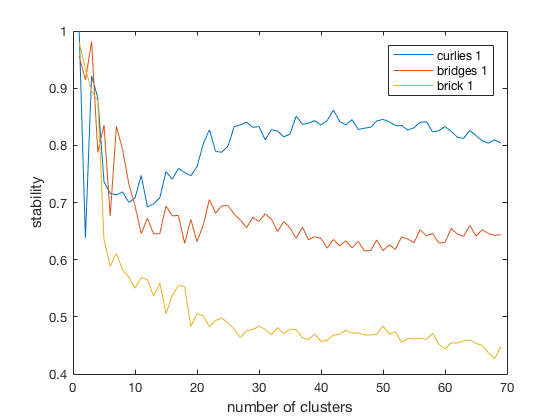

In [86]:
plot(mmet(1:3,:)')
xlabel('number of clusters')
ylabel('cluster stability')
legend({'curlies 1';'bridges 1'; 'brick 1' ; 'curlies 2';'bridges 2'; 'brick 2' })

In [82]:
% Compute cluster stability for different simulations

Nshuffle = 20;

win  = 3000;
trig = 1+[5000 9000];
trig = 5000;

cc = 1;
for ii = [1:3]
    for tr = trig
        z4{ii} = bsxfun(@times, z4{ii}, 1./std(z4{ii})); % Normalize the amplitude as well
        zn = corr(z4{ii}(trig:trig+win,:));
        zn(zn<0) = 0;
        [zn2, idxz] = make_rand_samples2(zn, Nshuffle, 0.8);
        v = spctcldata(zn);
        vs = cellfun(@spctcldata, zn2, 'UniformOutput', false);

        ngrid = 70 - 1;
        met = zeros(ngrid, Nshuffle*(Nshuffle-1)/2);
        rmet = zeros(ngrid, Nshuffle*(Nshuffle-1)/2);
        fprintf('i, Ncl\n');
        for i=1:ngrid
            Ncl = i+1;

            % Perform clustering on the random samples
            clidx = arrayfun(@(k) spctcl(vs{k}, Ncl, 1), 1:Nshuffle, 'UniformOutput', false);

            % Evaluate distance between each pair
            [pd, rpd] = cij2(clidx, idxz);
            met(i,:) = pd;
            rmet(i,:) = rpd;

            % fprintf('%d, %d\n', i, Ncl);
        end
        mmet(cc,:) = 1-mean(met'./rmet');
        sdmet(cc,:) = std(met'./rmet');
        cc = cc+1;


    end
end

i, Ncl
1, 2
2, 3
3, 4
4, 5
5, 6
6, 7
7, 8
8, 9
9, 10
10, 11
11, 12
12, 13
13, 14
14, 15
15, 16
16, 17
17, 18
18, 19
19, 20
20, 21
21, 22
22, 23
23, 24
24, 25
25, 26
26, 27
27, 28
28, 29
29, 30
30, 31
31, 32
32, 33
33, 34
34, 35
35, 36
36, 37
37, 38
38, 39
39, 40
40, 41
41, 42
42, 43
43, 44
44, 45
45, 46
46, 47
47, 48
48, 49
49, 50
50, 51
51, 52
52, 53
53, 54
54, 55
55, 56
56, 57
57, 58
58, 59
59, 60
60, 61
61, 62
62, 63
63, 64
64, 65
65, 66
66, 67
67, 68
68, 69
69, 70
i, Ncl
1, 2
2, 3
3, 4
4, 5
5, 6
6, 7
7, 8
8, 9
9, 10
10, 11
11, 12
12, 13
13, 14
14, 15
15, 16
16, 17
17, 18
18, 19
19, 20
20, 21
21, 22
22, 23
23, 24
24, 25
25, 26
26, 27
27, 28
28, 29
29, 30
30, 31
31, 32
32, 33
33, 34
34, 35
35, 36
36, 37
37, 38
38, 39
39, 40
40, 41
41, 42
42, 43
43, 44
44, 45
45, 46
46, 47
47, 48
48, 49
49, 50
50, 51
51, 52
52, 53
53, 54
54, 55
55, 56
56, 57
57, 58
58, 59
59, 60
60, 61
61, 62
62, 63
63, 64
64, 65
65, 66
66, 67
67, 68
68, 69
69, 70
i, Ncl
1, 2
2, 3
3, 4
4, 5
5, 6
6, 7
7, 8
8, 9
9, 10
1

In [22]:
zc

Error using eval
Undefined function or variable 'zc'.



In [87]:
connectivity_comparisons

Error using eval
Undefined function or variable 'connectivity_comparisons'.



In [90]:
addpath(genpath('/Users/M/Synced/Projects/Experiments/Olive/model/OliveTree'))


ans =

     0


ans =

     0


ans =

     0


ans =

     0


ans =

     0


ans =

     0


ans =

     0



Error using surf (line 82)
Z must be a matrix, not a scalar or vector.

Error in connectivity_comparisons (line 403)
	M1_wd = surf( n_connections, radiuses, clusterSURF1_wd), hold on; set(M1_wd, 'edgecolor','g','facecolor','g') ; 



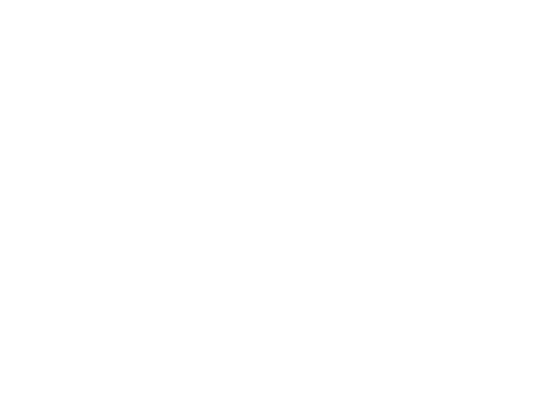

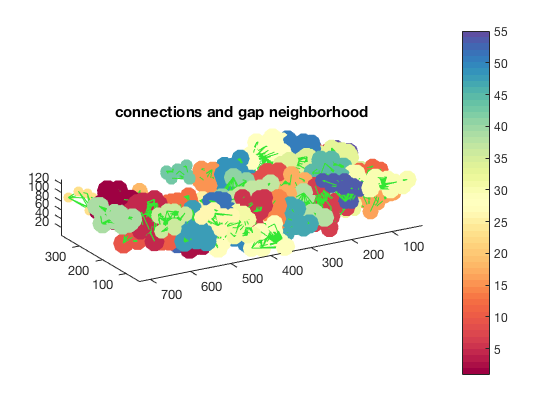

In [95]:
connectivity_comparisons

In [97]:
clusterSURF2_wd



clusterSURF2_wd =

    0.0616

